# Overfitting In ANN

Neural networks typically have **tens of thousands of parameters**, making them prone to **overfitting**.
- Overfitting occurs when a neural network is too large or complex for the given data, such as being overly wide or deep relative to the simplicity of the dataset.
- During training, the **training loss continues to decrease**, indicating the model fits training data well.
- However, the **validation loss initially decreases but then starts increasing**, signaling that the model is memorizing the training data rather than generalizing to unseen data.
- This results in poor performance on new, real-world data despite excellent training accuracy.
- **Regularization** techniques are essential in controlling model complexity and improving generalization.
- When regularization (such as dropout, L1/L2 penalties, or early stopping) is applied, even complex models may experience **slightly higher overall loss**.
- Yet, both the **training and validation losses decrease steadily**, demonstrating improved generalization.
- Such models perform well not only on training data but also generalize better to new validation data, indicating stronger real-world applicability.
- Many modern methods leverage the **stochastic nature** of training to introduce beneficial variability that acts as implicit regularization.

Mini-batch gradient descent **improves training efficiency and helps prevent overfitting through its inherent stochasticity.**

- By calculating the loss over small, randomly selected subsets of data, each gradient approximation differs slightly from the full dataset gradient, **effectively introducing noise into the training process.**

- This **noise acts as a form of regularization**, preventing the model from exactly fitting the training data and thus promoting better generalization to unseen data.
- In essence, mini-batching adds a beneficial `randomness` or variability that discourages the model from overfitting, a technique that's widely used in practice for improving neural network robustness.


## A Regression Problem

Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.utils import plot_model
from keras.callbacks import TensorBoard, EarlyStopping
from keras.models import Sequential, Model
from keras import regularizers
from keras.layers import Input, Dense, Activation, Dropout, BatchNormalization

import warnings
warnings.filterwarnings('ignore')

### Load data

In [ ]:
train_data = pd.read_csv('/content/sample_data/california_housing_train.csv')
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
train_data.shape

(17000, 9)

In [ ]:
X_train = train_data.drop(columns = ['median_house_value'])
y_train = train_data['median_house_value']
X_train.shape, y_train.shape

((17000, 8), (17000,))

In [ ]:
test_data = pd.read_csv('/content/sample_data/california_housing_test.csv')
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
test_data.shape

(3000, 9)

In [ ]:
X_test = test_data.drop(columns = ['median_house_value'])
y_test = test_data['median_house_value']
X_test.shape, y_test.shape

((3000, 8), (3000,))

### Model building

In [ ]:
model = Sequential([
    Input(shape = (X_train.shape[1],)),
    Dense(units = 64, activation = 'relu'),
    Dense(units = 64, activation = 'relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 16, activation = 'relu'),
    Dense(units = 1) # Default linear activation is considered
])
model

<Sequential name=sequential_1, built=True>

### Compile the model

In [ ]:
model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['r2_score'])

In [ ]:
history = model.fit(x = X_train,
                    y = y_train,
                    shuffle = True,
                    batch_size = 32,
                    validation_split = 0.2,
                    epochs = 100)

Epoch 1/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 146801.7812 - r2_score: -1.9076 - val_loss: 130095.5938 - val_r2_score: -0.7651
Epoch 2/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 97176.5547 - r2_score: -0.5447 - val_loss: 98498.6953 - val_r2_score: 0.0408
Epoch 3/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 77152.0078 - r2_score: 0.1412 - val_loss: 94216.4297 - val_r2_score: 0.1595
Epoch 4/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 76031.2969 - r2_score: 0.1869 - val_loss: 94211.8516 - val_r2_score: 0.1416
Epoch 5/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 73978.6875 - r2_score: 0.2229 - val_loss: 89302.0625 - val_r2_score: 0.2669
Epoch 6/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 72387.8594 - r2_score: 0.2535 - val_loss: 91069.4062 - val_r2_score: 0.1890
Epoch 7/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 70588.7031 - r2_score: 0.2894 - val_loss: 83312.0781 - val_r2_score: 0.3495
Epoch 8/100
425/425 ━━━━━━━━━━━━━━━━

In [ ]:
history.history.keys()

dict_keys(['loss', 'r2_score', 'val_loss', 'val_r2_score'])

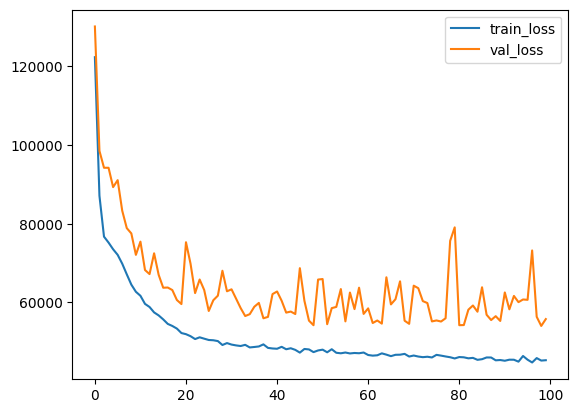

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

### Test the model

In [ ]:
model.evaluate(x = X_test, y = y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52836.8008 - r2_score: 0.5359


[54311.31640625, 0.5277087688446045]

## L1 and L2 Regularization


- Regularization is commonly achieved by **adding a penalty term** to the loss function to discourage overly complex models:

  $$
  \text{Objective function} = \text{Loss function (Error term)} + \text{Regularization term}
  $$

  $$
  J(w) = L(F(x_i), w, b) + \lambda f(w)
  $$
  - $L(F(x_i), w, b)$: loss function involving predictions $F(x_i)$ and parameters $w, b$
  - $\lambda$: regularization coefficient (controls strength)
  - $f(w)$: parameter norm

### Parameter Norm-Based Regularization

These methods incorporate a penalty term in the loss function, effectively constraining the model complexity. Two primary variants for $f(w)$:

1. **L1 Regularization:**
   $$
   f(w) = \|w\|_1 = \sum_j |w_j|
   $$
   - Encourages **sparsity** in weights by penalizing the absolute value of weights—pushing many to exactly zero.
   - Used in lasso regression

2. **L2 Regularization:**
   $$
   f(w) = \|w\|_2^2 = \sum_j w_j^2
   $$
   - Encourages weights to be **small** (but not necessarily zero) by penalizing the squared magnitude of weights.
   - More common in neural networks due to differentiability (useful for backpropagation)

**Note:** Only **weights** (not biases) are typically regularized for best performance.

- This **parameter norm regularization** closely parallels lasso (L1) and ridge (L2) regression.
- L1 tends to yield a **sparse** solution, while L2 shrinks all weights without driving many to zero.


### Regularization in Keras Dense Layer

In TensorFlow’s Keras API, dense layers allow you to control how the model's weights are regularized to reduce overfitting. The most common options are **L1** and **L2** regularization, each with distinct mathematical effects on the training process:

```python
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```



#### Key Arguments for Regularization

- **kernel_regularizer:**  
  *A regularizer function applied to the kernel (weight matrix) of the layer.*  
  For example, you can use:
  - `tf.keras.regularizers.l1(l1_value)`
  - `tf.keras.regularizers.l2(l2_value)`
  - `tf.keras.regularizers.l1_l2(l1=l1_value, l2=l2_value)`

- **bias_regularizer:**  
  *A regularizer function applied to the bias vector of the layer.*  
  It can use the same L1 or L2 functions, but regularizing the bias is less common and may not always benefit model performance.

| Parameter              | Purpose                                              | Example                                      |
|------------------------|------------------------------------------------------|----------------------------------------------|
| `kernel_regularizer`   | Penalizes large weights; helps prevent overfitting   | `regularizers.l2(0.001)`                     |
| `bias_regularizer`     | Penalizes large bias values; less commonly used      | `regularizers.l1(0.001)`                     |

### Model building

In [ ]:
from keras import regularizers
model = Sequential([
    Input(shape = (X_train.shape[1],)),
    Dense(units = 128, activation = 'relu',
          kernel_regularizer=regularizers.l1_l2(l1 = 0.001, l2 = 0.001),
          bias_regularizer=regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
    Dense(units = 64, activation = 'relu',
          kernel_regularizer=regularizers.l1_l2(l1 = 0.001, l2 = 0.001),
          bias_regularizer=regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
    Dense(units = 32, activation = 'relu',
          kernel_regularizer=regularizers.l1_l2(l1 = 0.001, l2 = 0.001),
          bias_regularizer=regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
    Dense(units = 16, activation = 'relu',
          kernel_regularizer=regularizers.l1_l2(l1 = 0.001, l2 = 0.001),
          bias_regularizer=regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
    Dense(units = 8, activation = 'relu',
          kernel_regularizer=regularizers.l1_l2(l1 = 0.001, l2 = 0.001),
          bias_regularizer=regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
    Dense(units = 1)
])
model

<Sequential name=sequential_2, built=True>

### Compile the model

In [ ]:
model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['r2_score'])

In [ ]:
history = model.fit(x = X_train,
                    y = y_train,
                    shuffle = True,
                    batch_size = 32,
                    validation_split = 0.2,
                    epochs = 100)

Epoch 1/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 149464.7656 - r2_score: -1.9839 - val_loss: 117589.9766 - val_r2_score: -0.4600
Epoch 2/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 81991.2734 - r2_score: -0.0492 - val_loss: 96027.0781 - val_r2_score: 0.1234
Epoch 3/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 77207.1016 - r2_score: 0.1498 - val_loss: 97332.8906 - val_r2_score: 0.0695
Epoch 4/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 75150.1875 - r2_score: 0.1836 - val_loss: 92099.3438 - val_r2_score: 0.1795
Epoch 5/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 72812.4688 - r2_score: 0.2538 - val_loss: 86862.4062 - val_r2_score: 0.2927
Epoch 6/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 70551.9375 - r2_score: 0.2971 - val_loss: 89173.3281 - val_r2_score: 0.2061
Epoch 7/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 67270.3594 - r2_score: 0.3573 - val_loss: 77115.2188 - val_r2_score: 0.4431
Epoch 8/100
425/425 ━━━━━━━━━━━━━━━━

In [ ]:
history.history.keys()

dict_keys(['loss', 'r2_score', 'val_loss', 'val_r2_score'])

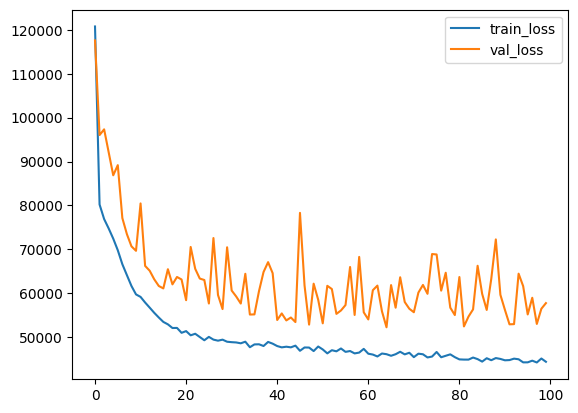

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

### Test the model

In [ ]:
model.evaluate(x = X_test, y = y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44644.9609 - r2_score: 0.6614


[46385.3125, 0.6487159132957458]

### Activity Regularization

Activity regularization helps prevent overfitting by imposing penalties directly on the outputs (activations) of each layer, discouraging them from becoming too large. This form of regularization is especially helpful in networks with many hidden neurons because even if individual weights are small, the combined sum of weighted inputs to a neuron can still produce large activations.

Mathematically, similar to L1 and L2 weight regularization, activity regularization adds a penalty term to the loss function based on the activations $ h $ of neurons:

- **L1 Activity Regularization** encourages sparsity in neuron outputs by pushing some activations toward zero, effectively silencing less important neurons. This is particularly useful in sparse autoencoders, where it helps capture salient features by promoting sparse latent representations.

  - L1 activity regularization adds the sum of absolute activations:
  $$
  L_{activity}^{L1} = \lambda \sum_{i} |h_i|
  $$
  This encourages sparsity by pushing some neuron outputs exactly to zero. Here, $ \lambda $ controls the strength of regularization.

- **L2 Activity Regularization** reduces the overall magnitude of neuron outputs, encouraging smaller activations across the network, which can prevent any neuron from dominating and improve generalization.

  - L2 activity regularization adds the sum of squared activations:
  $$
  L_{activity}^{L2} = \lambda \sum_{i} h_i^2
  $$
  This encourages smaller overall neuron outputs. Here, $ \lambda $ controls the strength of regularization.

### Model building

In [ ]:
from keras import regularizers
model = Sequential([
    Input(shape = (X_train.shape[1],)),
    Dense(units = 128, activation = 'relu',
          activity_regularizer=regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
    Dense(units = 64, activation = 'relu',
          activity_regularizer=regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
    Dense(units = 32, activation = 'relu',
          activity_regularizer=regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
    Dense(units = 16, activation = 'relu',
          activity_regularizer=regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
    Dense(units = 8, activation = 'relu',
          activity_regularizer=regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
    Dense(units = 1)
])
model

<Sequential name=sequential_3, built=True>

### Compile the model

In [ ]:
model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['r2_score'])

In [ ]:
history = model.fit(x = X_train,
                    y = y_train,
                    shuffle = True,
                    batch_size = 32,
                    validation_split = 0.2,
                    epochs = 100)

Epoch 1/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 362914.5938 - r2_score: -3.1625 - val_loss: 246575.3594 - val_r2_score: -3.7281
Epoch 2/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 197712.0625 - r2_score: -3.1825 - val_loss: 246452.7188 - val_r2_score: -3.7258
Epoch 3/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 197912.0000 - r2_score: -3.1943 - val_loss: 246372.7812 - val_r2_score: -3.7216
Epoch 4/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 197854.1406 - r2_score: -3.1661 - val_loss: 246270.8750 - val_r2_score: -3.7157
Epoch 5/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 197312.2969 - r2_score: -3.1480 - val_loss: 246146.6875 - val_r2_score: -3.7083
Epoch 6/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 196981.9844 - r2_score: -3.2109 - val_loss: 245997.1719 - val_r2_score: -3.6994
Epoch 7/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 196026.8594 - r2_score: -3.1564 - val_loss: 245827.5625 - val_r2_score: -3.6892
Epoch 8/100
4

In [ ]:
history.history.keys()

dict_keys(['loss', 'r2_score', 'val_loss', 'val_r2_score'])

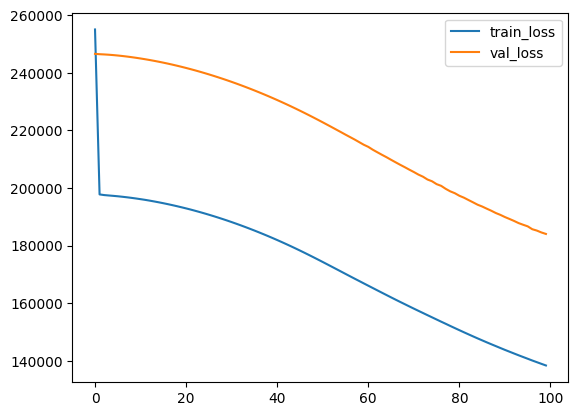

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

### Test the model

In [ ]:
model.evaluate(x = X_test, y = y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 143562.9062 - r2_score: -0.8909


[145067.890625, -0.8868721723556519]

- Apart from parameter norm regularization, **dropout** is a widely-used technique:
  - Randomly drops nodes during training to prevent over-reliance on specific parameters and improve robustness.

## Dropout Regularizer

- Introduced by Geoffrey Hinton and his team, **Dropout** is a modern, widely used regularization technique.
- Dropout is a **stochastic regularization technique** that randomly drops (sets to zero) a subset of neurons during training.
- This prevents overfitting by **breaking co-adaptations** between neurons and forcing the network to learn robust features.
- Unlike L1/L2, Dropout does **not add penalty terms** to the cost function.
- Instead, during training, Dropout randomly `drops out` (deactivates) a subset of neurons in each forward pass.
- **This prevents units from relying too heavily on specific inputs or other neurons, forcing the network to learn robust representations.**
- Dropout is easy to implement and highly effective across many neural network types and tasks.

#### Alternate explanation

- Dropouts help in symmetry breaking as well.
- There is every possibility of the creation of communities within neurons which restricts them from learning independently.
- Hence, by setting some random set of the weights to zero in every iteration, this community/symmetry is broken.


### Analogy: Ensembles in Machine Learning

- Dropout can be seen as **emulating an ensemble of many neural networks** with different architectures.
- **Ensemble methods** combine predictions from multiple models to improve accuracy.
- Rather than explicitly training multiple networks and averaging their predictions—which is computationally expensive—Dropout implicitly averages over many subnetworks by random node omission during training.
- Ensemble methods are known to boost predictive performance and have won major competitions such as the Netflix Prize.
- Models differ by training on different data subsets or feature subsets.  
  - Example 1: Train 10 decision trees each on separate 100k subsets of a 1 million point dataset.  
  - Example 2: Train models on different feature sets (e.g., 100 features divided across 10 trees).
- Ensembles increase robustness and reduce overfitting.
- Dropout **emulates an ensemble** of exponentially many networks with shared weights but different structures.

### Dropout as Ensemble Approximation

- The stochastic behavior introduced by Dropout and mini-batch training **injects noise that regularizes training**, reducing overfitting.
- Dropout trains a **single neural network** but randomly **drops out nodes** throughout each layer (not just input).
- Each node is **kept or dropped** with probabilities $ p_{keep} $ and $ p_{drop} $, e.g., $p_{keep}=0.8$ for input layer and $p_{drop}=0.5$ for hidden layers.
- Because many nodes can be on or off, dropout effectively represents an **ensemble of $ 2^N $ different “thinned” networks** where $ N $ is the total number of nodes.
- Training all $ 2^N $ networks explicitly is infeasible; dropout efficiently **approximates ensemble averaging** via stochastic node dropping.

### Dropout During Training and Prediction

- **Training:** Nodes are randomly dropped **each iteration**, forcing the network to learn redundant, distributed representations.  
- **Prediction:** No nodes are dropped; instead, outputs are scaled by $ p_{keep} $ to approximate averaging over all thinned networks.

#### Mathematical Operation

- Dropout modifies the weight matrix $ W^l $ at layer $ l $ by **element-wise multiplication with a mask vector** $ \alpha $:
  
  $$
  W^l_{drop} = W^l \cdot \alpha
  $$
  
- For example, if $ W^1 $ is a $ 4 \times 3 $ matrix and $ \alpha $ is a $ (3,1) $ vector sampled from a Bernoulli distribution with success probability $ q = 0.66 $, $ \alpha $ might be:

  $$
  \alpha \in \left\{
  \begin{bmatrix}1 \\ 1 \\ 0 \end{bmatrix},
  \begin{bmatrix}1 \\ 0 \\ 1 \end{bmatrix},
  \begin{bmatrix}0 \\ 1 \\ 1 \end{bmatrix}
  \right\}
  $$

- Multiplying results in dropping corresponding nodes (columns) by setting their weights to zero, **effectively removing their contribution for that mini-batch.**

#### Practical Implementation

- During training, a **different mask $ \alpha $** is sampled per mini-batch.
- During prediction, no nodes are dropped; instead, outputs are scaled by $ p_{keep} $ to balance expectations.
- Dropout can be implemented succinctly in frameworks like Keras via:

  ```python
  model.add(Dropout(0.2))  # Drops 20% of neurons
  ```

- Dropout is typically **not applied to output layers**.

### Model building

In [ ]:
from keras import regularizers
model = Sequential([
    Input(shape = (X_train.shape[1],)),
    Dense(units = 128, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 64, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 32, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 16, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 8, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 1)
])
model

<Sequential name=sequential_7, built=True>

### Compile the model

In [ ]:
model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['r2_score'])

In [ ]:
history = model.fit(x = X_train,
                    y = y_train,
                    shuffle = True,
                    batch_size = 32,
                    validation_split = 0.2,
                    epochs = 100)

Epoch 1/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 149391.6719 - r2_score: -1.9774 - val_loss: 119240.0156 - val_r2_score: -0.5041
Epoch 2/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 95721.4922 - r2_score: -0.3299 - val_loss: 96523.0234 - val_r2_score: 0.0854
Epoch 3/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 89465.8203 - r2_score: -0.1337 - val_loss: 98436.9609 - val_r2_score: 0.0349
Epoch 4/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 85767.6250 - r2_score: -0.0609 - val_loss: 90881.3203 - val_r2_score: 0.2012
Epoch 5/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 83969.3203 - r2_score: -0.0068 - val_loss: 89713.2812 - val_r2_score: 0.2060
Epoch 6/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 82095.7109 - r2_score: 0.0300 - val_loss: 91713.4375 - val_r2_score: 0.1499
Epoch 7/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 80488.8750 - r2_score: 0.0465 - val_loss: 82132.0391 - val_r2_score: 0.3418
Epoch 8/100
425/425 ━━━━━━━━━━━━━

In [ ]:
history.history.keys()

dict_keys(['loss', 'r2_score', 'val_loss', 'val_r2_score'])

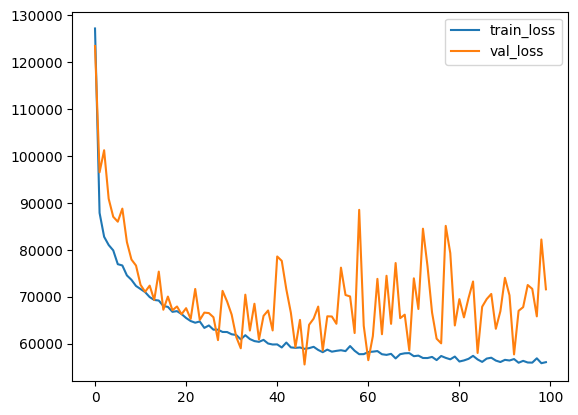

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

### Test the model

In [ ]:
model.evaluate(x = X_test, y = y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46987.2188 - r2_score: 0.6352


[49039.53515625, 0.6216099262237549]

### Dropout: Scale up and Scale down

#### Dropout During Training



- During training, dropout randomly selects and deactivates (sets to 0) a subset of neurons in each layer, introducing stochasticity into the network.
- When a neuron's output is zeroed, its outgoing weights are not updated (no backpropagation gradient flows through them), temporarily removing that neuron's influence from the network.

### Scaling to Match Training and Prediction



- There is a key difference between training (with dropout) and prediction (no dropout); all neurons are active during inference, so their average contribution would otherwise be higher than during training.
- **Scaling is needed** to align the expected sum of neuron outputs between training and prediction.
    - **Scale-up method (used in Keras):** During training, the surviving (non-dropped) activations are divided by the keep probability $(1 - \text{dropout rate})$, increasing their value.
    - **Scale-down method:** Alternatively, keep activations unchanged during training, and multiply all weights or activations by the keep probability at prediction.
- Both methods ensure that the average total input to any layer is consistent between training and inference.

#### Dropout Layer in Practice

- The Dropout layer sets input units to zero with a specified dropout rate during training, helping to prevent overfitting.
- Non-zeroed inputs are scaled up by $1/(1 - \text{dropout rate})$ during training, so the sum of inputs remains unchanged on average.
- This enables robust model averaging during training and maintains stability during prediction.

## Early Stopping

- Early stopping is a **regularization technique** that halts neural network training when the performance on a held-out validation set no longer improves.
  - Early stopping monitors validation performance during training and stops the process once improvement stalls, making it a practical regularization technique readily implemented via Keras callbacks.
- It prevents overfitting by stopping training before the model starts to memorize the training data excessively.

### Why Early Stopping Is Needed?

- The core challenge: **Maximizing generalization performance (real-world accuracy) does not align perfectly with minimizing training loss**, which is what stochastic gradient descent (SGD) optimizes.
- SGD iteratively minimizes training loss, but after some point, further training reduces training loss while increasing validation loss — a sign of overfitting.
- Training to full convergence on training data may harm model generalization.

### How Early Stopping Works?

- During training, after every epoch, the model's performance (e.g., validation loss or accuracy) is monitored.
- Initially, both training and validation losses decrease.
- After some iterations, training loss continues decreasing but validation loss starts increasing.
- If the monitored metric does not improve for a specified number of epochs (`patience`), training is stopped.
- Early stopping selects the model at the **epoch with minimal validation loss**, typically earlier than the final epoch.
- This ensures the model retains weights from the epoch with the best validation performance.

### Keras Implementation

- Keras provides a built-in callback class for early stopping: `EarlyStopping`.
- Common parameters include:
  - `monitor`: Metric to observe (e.g., `'val_loss'`, `'val_accuracy'`).
  - `patience`: Number of epochs to wait without improvement before stopping.
  - `min_delta`: Minimum change to qualify as an improvement.
  - `mode`: Direction of improvement, `'min'` for loss, `'max'` for accuracy, or `'auto'` to infer automatically.

  ```python
  from tensorflow.keras.callbacks import EarlyStopping

  early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.01, mode='min')
  
  model.fit(X_train, y_train,
            epochs=100,
            validation_split=0.2,
            callbacks=[early_stopping])
  ```

- Using a list for `callbacks` allows for combining multiple callbacks (e.g., checkpoint saving, learning rate adjustment).

### Model building

In [ ]:
from keras import regularizers
model = Sequential([
    Input(shape = (X_train.shape[1],)),
    Dense(units = 128, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 64, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 32, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 16, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 8, activation = 'relu'),
    Dropout(0.2),
    Dense(units = 1)
])
model

<Sequential name=sequential_8, built=True>

### Compile the model

In [ ]:
model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['r2_score'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.01, mode='min')

In [ ]:
history = model.fit(x = X_train,
                    y = y_train,
                    shuffle = True,
                    batch_size = 32,
                    validation_split = 0.2,
                    callbacks = [early_stopping],
                    epochs = 100)

Epoch 1/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 149165.7188 - r2_score: -2.0836 - val_loss: 127951.4531 - val_r2_score: -0.7187
Epoch 2/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 95333.3125 - r2_score: -0.3494 - val_loss: 105091.4844 - val_r2_score: -0.1181
Epoch 3/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 89833.6094 - r2_score: -0.1913 - val_loss: 98546.9922 - val_r2_score: 0.0302
Epoch 4/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 89575.2500 - r2_score: -0.1480 - val_loss: 99373.4219 - val_r2_score: 0.0093
Epoch 5/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 86148.0547 - r2_score: -0.0642 - val_loss: 96768.5859 - val_r2_score: 0.0682
Epoch 6/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 85111.0312 - r2_score: -0.0544 - val_loss: 92302.9609 - val_r2_score: 0.1536
Epoch 7/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 84652.5312 - r2_score: -0.0114 - val_loss: 87601.0391 - val_r2_score: 0.2375
Epoch 8/100
425/425 ━━━━━━━━━

In [ ]:
history.history.keys()

dict_keys(['loss', 'r2_score', 'val_loss', 'val_r2_score'])

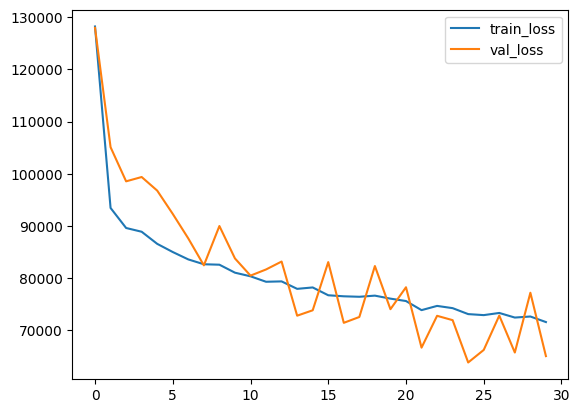

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

### Test the model

In [ ]:
model.evaluate(x = X_test, y = y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52966.9961 - r2_score: 0.5513


[54904.26171875, 0.5332138538360596]

- Apart from parameter norm regularization, **dropout** is a widely-used technique:
  - Randomly drops nodes during training to prevent over-reliance on specific parameters and improve robustness.

## Batch Normalization

Batch Normalization is an essential modern tool in deep learning that normalizes layer inputs to improve training speed, stability, and model generalization by internally standardizing activations at every layer.
- In machine learning, **normalization** is common practice to **normalize input data** (e.g., subtract mean and divide by standard deviation) to improve training effectiveness.

### What is Batch Normalization?

- Instead of normalizing only the input data before training, **Batch Normalization (BN)** integrates normalization as a built-in operation within the neural network at each layer.
- Batch normalization **moves normalization into the model** itself rather than preprocessing.
- BN normalizes the inputs to every layer during training, **ensuring each layer receives activations with consistent mean and variance**.
- It **normalizes activations per mini-batch during training** by computing batch mean and variance.
- Conceptually, each layer behaves like a small logistic regression, and **BN normalizes layer inputs before applying the activation function**.
  - Batch Normalization **normalizes the pre-activation inputs (the linear transformation outputs) to have zero mean and unit variance per batch.** It then scales and shifts them using trainable parameters $\gamma$ and $\beta$.
- Activations normalized this way **concentrate in the most dynamic region of nonlinear activation functions**, improving gradient flow and learning efficiency.

#### Why Before Activation?

- If you apply BN after activation, you’ll normalize nonlinear outputs (e.g., from ReLU), which can distort their intended shape — especially since activations like ReLU zero-out negative values.

- Applying BN before the activation ensures:
  - Inputs to the activation have consistent distributions
  - Gradients flow more smoothly
  - Training becomes more stable and faster

- The original Batch Normalization paper (Ioffe & Szegedy, 2015) and most architectures (e.g., ResNet, VGG variants, Transformers) apply BN before the activation (i.e., to the affine transformation output).

### Why Batch Normalization is Useful?

- BN reduces the problem of **internal covariate shift**—the change in distribution of inputs to layers during training.
- Maintaining stable input distributions to layers stabilizes training, enables **higher learning rates**, and helps **prevent gradient issues** such as vanishing or exploding gradients.
- Empirically, batch normalization accelerates training and improves generalization in deep networks.
- **This scaling keeps inputs within a range where activation functions (e.g., sigmoid, tanh) are most responsive.**

#### What is Covariate Shift?

- **Covariate shift** refers to the difference in data distribution between the training set and the test set.
- This shift can reduce model predictive performance, as the model sees different data distributions during training and evaluation.
- Common techniques to handle covariate shift include importance sampling, data standardization, or whitening during preprocessing.

#### What is Internal Covariate Shift?

- **Internal covariate shift** is a related but distinct problem occurring inside deep neural networks.
- It describes the phenomenon where the **distribution of inputs to each layer changes during training** because the parameters of preceding layers are updated.
- This continual change slows training convergence and complicates optimization.

##### How to address Internal Covariate Shift?

- Batch normalization tackles internal covariate shift by **normalizing the inputs of each layer** per mini-batch.
- It ensures stable distributions of layer inputs throughout training, improving both speed and robustness of optimization.

### Batch Normalization Mechanism

- It's called **batch normalization** because we'll be doing batch gradient descent.
- **During training**, we consider a small batch of data for each gradient descent step
- BN performs **normalization within each mini-batch**, computing:

  $$
  \mu_B = \frac{1}{m} \sum_{i=1}^m x_i, \quad \sigma_B^2 = \frac{1}{m} \sum_{i=1}^m (x_i - \mu_B)^2
  $$
  
- Normalize activations:

  $$
  \hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}
  $$

  where $ \epsilon $ is to stabilize denominator.

- Apply learnable scale and shift:

  $$
  y_i = \gamma \hat{x}_i + \beta
  $$
- BN parameters for shifting and scaling activations ($\gamma$ and $\beta$) are learned alongside other weights.
- BN is applied **after the linear transform and before activation functions**.

### Why Unstandardize After Standardization?

- Batch norm learns adaptive scale and shift parameters to potentially reverse standardization if beneficial.
- After normalizing activations by subtracting batch mean and dividing by batch standard deviation, batch normalization applies a **learnable scale ($\gamma$) and shift ($\beta$)**:

  $$
  \hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}},
  $$

  $$
  \quad y_i = \gamma \hat{x}_i + \beta
  $$

- Standardization alone **may not be optimal** for the model.
- Allowing the network to learn $\gamma$ and $\beta$ via gradient descent lets it find the **best scale and shift** that minimize the cost function.
- If standardization is ideal, the network will learn $\gamma = 1$, $\beta = 0$.
- This flexibility means BN can adapt to different data distributions and tasks during training.


### Training versus Testing in Batch Normalization
- Batch Normalization (BN) modifies both forward propagation and backpropagation, because the normalization operation depends on batch statistics (mean and variance) that themselves depend on the inputs.
- Uses batch statistics during training but relies on running population statistics at test time.
- BN computes **batch statistics** ($\mu_B, \sigma_B^2$) during training, but at test time only a **single example** is available, making batch statistics meaningless.
- **Naively standardizing a single sample would zero it out**, causing loss of information.
- Hence during **testing**, BN use running averages $ \mu, \sigma^2 $ to ensure stable normalization.

- During training, BN keeps **exponentially weighted moving averages** (running mean $\mu$ and running variance $\sigma^2$) of batch statistics:

  $$
  \mu \leftarrow \text{decay} \times \mu + (1 - \text{decay}) \times \mu_B
  $$
  $$
  \sigma^2 \leftarrow \text{decay} \times \sigma^2 + (1 - \text{decay}) \times \sigma_B^2
  $$
- Running averages computed with exponential smoothing ensure smooth, scalable estimation for inference.
- These moving averages are used during **inference** (test time) for normalization:

  $$
  \hat{x}_{test} = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}}, \quad y_{test} = \gamma \hat{x}_{test} + \beta
  $$
  with $\epsilon$ for numerical stability.
- This ensures that test data is normalized consistently with training, yielding stable predictions.
- This mechanism balances normalization benefits with flexibility and practical deployment needs.

Backpropagation Through Batch Normalization

- In backprop, we compute gradients for all parameters and inputs:
  - $ \frac{\partial L}{\partial \gamma} $
  - $ \frac{\partial L}{\partial \beta} $

- Gradient wrt γ and β

  - These are straightforward:
$$
\frac{\partial L}{\partial \beta} = \sum_{i=1}^m \frac{\partial L}{\partial y_i}
$$
$$
\frac{\partial L}{\partial \gamma} = \sum_{i=1}^m \frac{\partial L}{\partial y_i} \cdot \hat{z}_i
$$

- Learnable Parameters Update

  - Once the gradients $\frac{\partial L}{\partial \gamma}$ and $\frac{\partial L}{\partial \beta}$ are computed, updates follow standard gradient descent:
$$
\gamma := \gamma - \eta \frac{\partial L}{\partial \gamma}
$$
$$
\beta := \beta - \eta \frac{\partial L}{\partial \beta}
$$


During backpropagation:
- The BN layer re-normalizes gradients so that they neither explode nor vanish.
- The layer maintains scale-invariance — scaling the inputs doesn’t affect learning dynamics.
- Gradients flow more stably through deep networks since normalization smooths out large activations.

### Practical Implementation

Instead of normalizing pre-activation $ Z_l $, normalizing the post-activation $ H_l $ is another heuristic, but not supported by deep learning frameworks.

- Modern libraries like Keras implement BN by additionally introducing learnable scale and shift hyperparameters $ \gamma, \beta $:

$$
\mathrm{BN}(Z_l) = \gamma \hat{Z}_l + \beta
$$

**Example Keras code:**

```python
model.add(BatchNormalization(
          axis=-1,
          momentum=0.99,
          epsilon=0.001,
          center=True,
          scale=True,
          beta_initializer="zeros",
          gamma_initializer="ones",
          moving_mean_initializer="zeros",
          moving_variance_initializer="ones",
          beta_regularizer=None,
          gamma_regularizer=None,
          beta_constraint=None,
          gamma_constraint=None,
          synchronized=False,
          **kwargs
))
```

where `axis=-1` indicates normalization across features.

Batch Normalization is integral to modern training pipelines for its ability to accelerate convergence and improve generalization.


### Model building

In [ ]:
from keras import regularizers
model = Sequential([
    Input(shape = (X_train.shape[1],)),
    Dense(units = 128),
    BatchNormalization(axis=-1, momentum=0.99),
    Activation('relu'),
    Dropout(0.2),
    Dense(units = 64),
    BatchNormalization(axis=-1, momentum=0.99),
    Activation('relu'),
    Dropout(0.2),
    Dense(units = 32),
    BatchNormalization(axis=-1, momentum=0.99),
    Activation('relu'),
    Dropout(0.2),
    Dense(units = 16),
    BatchNormalization(axis=-1, momentum=0.99),
    Activation('relu'),
    Dropout(0.2),
    Dense(units = 8),
    BatchNormalization(axis=-1, momentum=0.99),
    Activation('relu'),
    Dropout(0.2),
    Dense(units = 1)
])
model

<Sequential name=sequential_10, built=True>

### Compile the model

In [ ]:
model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['r2_score'])

In [ ]:
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.01, mode='min')
# callbacks = [early_stopping],

In [ ]:
history = model.fit(x = X_train,
                    y = y_train,
                    shuffle = True,
                    batch_size = 32,
                    validation_split = 0.2,
                    epochs = 100)

Epoch 1/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 196838.5156 - r2_score: -3.2163 - val_loss: 246472.0000 - val_r2_score: -3.7284
Epoch 2/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 198765.3438 - r2_score: -3.1684 - val_loss: 246463.2812 - val_r2_score: -3.7281
Epoch 3/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 196186.1406 - r2_score: -3.1928 - val_loss: 246448.6250 - val_r2_score: -3.7277
Epoch 4/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 197596.1719 - r2_score: -3.0956 - val_loss: 246429.5938 - val_r2_score: -3.7271
Epoch 5/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 197299.3750 - r2_score: -3.1475 - val_loss: 246406.7969 - val_r2_score: -3.7264
Epoch 6/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 196578.5938 - r2_score: -3.1987 - val_loss: 246373.5000 - val_r2_score: -3.7254
Epoch 7/100
425/425 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 199571.9375 - r2_score: -3.1911 - val_loss: 246351.1094 - val_r2_score: -3.7247
Epoch 8/100
4

In [ ]:
history.history.keys()

dict_keys(['loss', 'r2_score', 'val_loss', 'val_r2_score'])

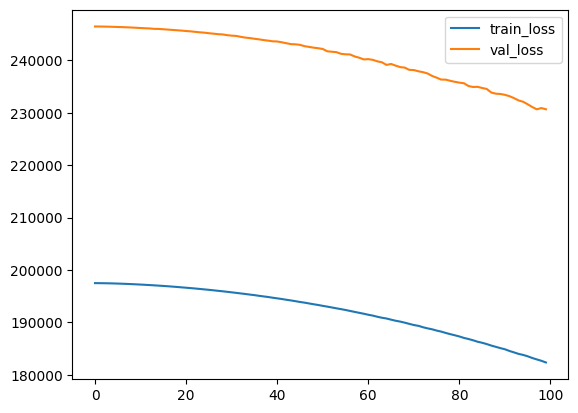

In [ ]:
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

### Test the model

In [ ]:
model.evaluate(x = X_test, y = y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 188533.9375 - r2_score: -2.8859


[190382.078125, -2.8281137943267822]

- Apart from parameter norm regularization, **dropout** is a widely-used technique:
  - Randomly drops nodes during training to prevent over-reliance on specific parameters and improve robustness.

### Benefits


- BN reduces **internal covariate shift** — the change in distribution of network activations during training.
- Enables use of **higher learning rates** and mitigates gradient issues.
- Acts as an **implicit regularizer**, sometimes reducing the need for dropout.
- Often eliminates need for bias parameters in layers due to mean subtraction.